<a href="https://colab.research.google.com/github/sebasmos/workshops/blob/main/workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 1️⃣ EDA & Study Design

**🎨 Team __**

`Add your team number above`

**👥 Authors**

`Add your names here (alphabetically)`


* 
*
*

**🎯 Goals of this Workshop**
1. Define Inclusion Criteria to build a working cohort
2. Explore the Ground-Truths, present in the data set


**✏️ Expected Deliverables**
1. Flow chart with inclusion and exclusion criteria, reporting who's being left out, by demographics
2. Define the Machine Learning Task to be addressed



**❗ Highlighted Pitfall(s)**
* Sampling and Representation Bias

## 0. Understand the Problem and Dataset

Please go through [Workshop 0](https://colab.research.google.com/gist/joamats/08338a27a51c02179f3d5e8b8f15cecb/workshop_0.ipynb) for an Introduction on the Problem, Dataset and Objective of the Datathon. As the Datathon schedule is very tight, this should be studied prior to attending the Event.


## 1. Inclusion/exclusion Criteria Definition

In discussion between Data Scientists and Clinicians, try to answer these questions:
* What is a reasonable $SaO_2$ and $SpO_2$ cut-off value to avoid aberrant values and venous blood gas value?
* What is a reasonable time offset between $SaO_2$ and $SpO_2$ to create a pair?
* Are there patients from any demographics or with certain comorbidities that should not be included?
* Is there any specific treatment information that may influence?
* How to deal with multiple pairs per patient?


When taking these decisions, keep these into consideration:
* Are we keeping a reasonable amount of patients?
* What are the consequences of these decisions if we were to implement the result of this project in a real setting?
* Are we seggregating any group of patients?
* Are there groups that are more likely to be dropped in any approach and could introduce sampling selection bias?


### ✏️ Discussed Criteria
`Fill in with the ones you come up with as a team `

* 
* 

## 2. Study Cohort Creation

**What is a Flowchart in this context?**

A Flowchart reflects the study cohort creation, by selecting the patients that best suit our study design.

It is a helpful tool to visualize the numbers after applying our inclusion and exclusion criteria.

**Example (part of one):**

<div>
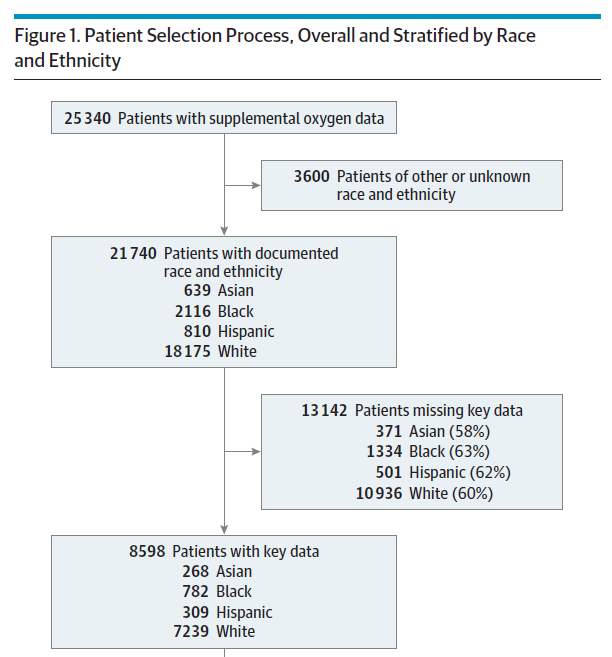
</div>

**Source:**
Gottlieb ER, Ziegler J, Morley K, Rush B, Celi LA. Assessment of Racial and Ethnic Differences in Oxygen Supplementation Among Patients in the Intensive Care Unit. JAMA Intern Med. 2022;182(8):849–858. https://doi:10.1001/jamainternmed.2022.2587

### ✏️ Initial Exploratory Data Analysis (EDA)

`Create code below to answer the following questions`



How many patients do we have per racial-ethnic group, sex, and other demographics?

In [3]:
# Code here!
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
# data = pd.read_csv("/content/drive/MyDrive/MIT_Data_Team4/MIMIC_IV.csv")
data = pd.read_csv("/content/drive/MyDrive/MIMIC_IV.csv")
data.head()
list(data.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['subject_id',
 'stay_id',
 'SaO2_timestamp',
 'SaO2',
 'delta_SpO2',
 'SpO2',
 'hidden_hypoxemia',
 'hadm_id',
 'gender',
 'sex_female',
 'anchor_age',
 'race',
 'race_group',
 'language',
 'insurance',
 'weight',
 'height',
 'BMI',
 'anchor_year_group',
 'first_hosp_stay',
 'first_icu_stay',
 'icustay_seq',
 'admittime',
 'dischtime',
 'icu_intime',
 'icu_outtime',
 'los_hospital',
 'los_icu',
 'CCI',
 'SOFA_admission',
 'mortality_in',
 'delta_vent_start',
 'ventilation_status',
 'invasive_vent',
 'delta_FiO2',
 'FiO2',
 'delta_rrt',
 'rrt',
 'delta_vp_start',
 'norepinephrine_equivalent_dose',
 'delta_sofa_coag',
 'sofa_coag',
 'delta_sofa_liver',
 'sofa_liver',
 'delta_sofa_cv',
 'sofa_cv',
 'delta_sofa_cns',
 'sofa_cns',
 'delta_sofa_renal',
 'sofa_renal',
 'delta_sofa_resp',
 'sofa_resp',
 'delta_hemoglobin',
 'hemoglobin',
 'delta_hematocrit',
 'hematocrit',
 'delta_mch',
 'mch',
 'delta_mchc',
 'mchc',
 'delta_mcv',
 'mcv',
 'delta_platelet',
 'platelet',
 'delta_rbc',
 'rbc',

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def ideal_hist_bins(all_vals):
  # q75, q25 = np.percentile(all_vals, [75,25])
  # iqr = q75 - q25
  # h = 2 * iqr / len(all_vals)**(1/3)
  # n_bins = int((max(all_vals) - min(all_vals)) / h)
  n_bins = int(1 + 3.322*np.log(len(all_vals)))
  return n_bins

In [6]:
patient_gender = data['gender']
patient_race = data['race']
patient_race_group = data['race_group']
patient_insurance = data['insurance']
patient_age = data['anchor_age']
patient_language = data['language']

Gender:
Counter({'M': 52894, 'F': 28903})


Text(0, 0.5, 'Percentage (%)')

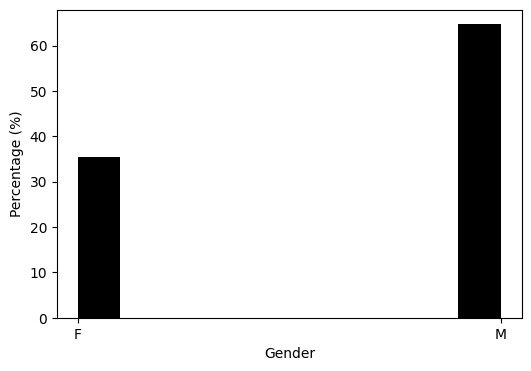

In [7]:
print('Gender:')
print(Counter(patient_gender))
plt.figure(figsize=(6,4))
plt.hist(patient_gender, weights=100*np.ones(len(patient_gender))/len(patient_gender), color='k')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')

Race:
Counter({'WHITE': 52033, 'UNKNOWN': 10519, 'BLACK/AFRICAN AMERICAN': 4821, 'OTHER': 2462, 'WHITE - OTHER EUROPEAN': 2063, 'UNABLE TO OBTAIN': 1783, 'HISPANIC/LATINO - PUERTO RICAN': 1029, 'ASIAN - CHINESE': 852, 'HISPANIC/LATINO - DOMINICAN': 849, 'ASIAN': 791, 'PATIENT DECLINED TO ANSWER': 680, 'HISPANIC OR LATINO': 580, 'WHITE - RUSSIAN': 508, 'BLACK/CAPE VERDEAN': 463, 'PORTUGUESE': 358, 'ASIAN - SOUTH EAST ASIAN': 290, 'AMERICAN INDIAN/ALASKA NATIVE': 286, 'ASIAN - ASIAN INDIAN': 278, 'BLACK/CARIBBEAN ISLAND': 214, 'BLACK/AFRICAN': 146, 'HISPANIC/LATINO - GUATEMALAN': 140, 'WHITE - BRAZILIAN': 123, 'WHITE - EASTERN EUROPEAN': 121, 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 112, 'HISPANIC/LATINO - CUBAN': 62, 'MULTIPLE RACE/ETHNICITY': 50, 'HISPANIC/LATINO - SALVADORAN': 45, 'HISPANIC/LATINO - COLUMBIAN': 41, 'SOUTH AMERICAN': 24, 'ASIAN - KOREAN': 23, 'HISPANIC/LATINO - MEXICAN': 20, 'HISPANIC/LATINO - CENTRAL AMERICAN': 18, 'HISPANIC/LATINO - HONDURAN': 13})


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'BLACK/AFRICAN AMERICAN'),
  Text(1, 0, 'OTHER'),
  Text(2, 0, 'WHITE'),
  Text(3, 0, 'UNABLE TO OBTAIN'),
  Text(4, 0, 'BLACK/CAPE VERDEAN'),
  Text(5, 0, 'UNKNOWN'),
  Text(6, 0, 'HISPANIC/LATINO - PUERTO RICAN'),
  Text(7, 0, 'ASIAN - SOUTH EAST ASIAN'),
  Text(8, 0, 'HISPANIC OR LATINO'),
  Text(9, 0, 'WHITE - OTHER EUROPEAN'),
  Text(10, 0, 'PORTUGUESE'),
  Text(11, 0, 'ASIAN'),
  Text(12, 0, 'HISPANIC/LATINO - DOMINICAN'),
  Text(13, 0, 'WHITE - RUSSIAN'),
  Text(14, 0, 'ASIAN - CHINESE'),
  Text(15, 0, 'ASIAN - ASIAN INDIAN'),
  Text(16, 0, 'PATIENT DECLINED TO ANSWER'),
  Text(17, 0, 'WHITE - BRAZILIAN'),
  Text(18, 0, 'AMERICAN INDIAN/ALASKA NATIVE'),
  Text(19, 0, 'BLACK/CARIBBEAN ISLAND'),
  Text(20, 0, 'HISPANIC/LATINO - CENTRAL AMERICAN'),
  Text(21, 0, 'HISPANIC/LATINO - ME

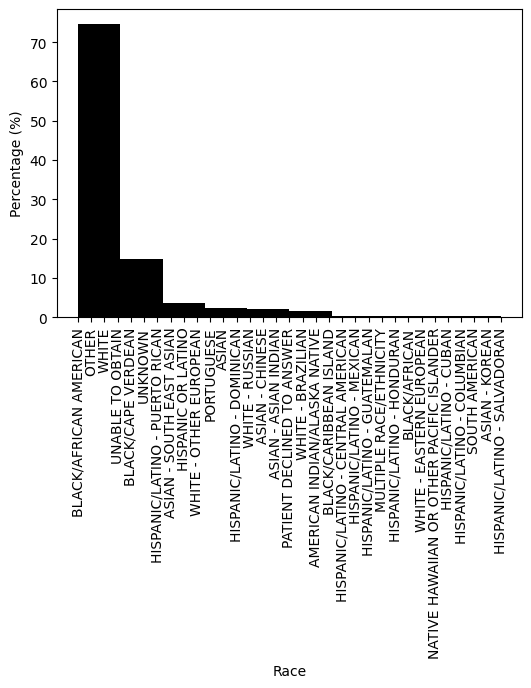

In [ ]:
# Should we exclude the patients with low representation? I guess after
# cleaning the final dataset
print('Race:')
print(Counter(patient_race))
plt.figure(figsize=(6,4))
plt.hist(patient_race, weights=100*np.ones(len(patient_race))/len(patient_race), color='k')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.xticks(rotation='vertical')

Race Group:
Counter({'White': 55206, 'Other': 15892, 'Black': 5644, 'Hispanic': 2821, 'Asian': 2234})


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Black'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Asian')])

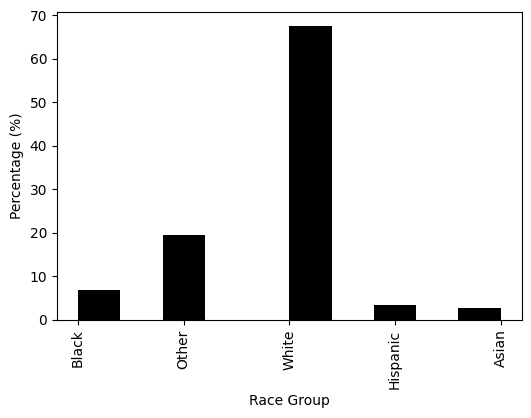

In [ ]:
print('Race Group:')
print(Counter(patient_race_group))
plt.figure(figsize=(6,4))
plt.hist(patient_race_group, weights=100*np.ones(len(patient_race_group))/len(patient_race_group), color='k')
plt.xlabel('Race Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation='vertical')

Insurance:
Counter({'Other': 39044, 'Medicare': 38065, 'Medicaid': 4688})


Text(0, 0.5, 'Percentage (%)')

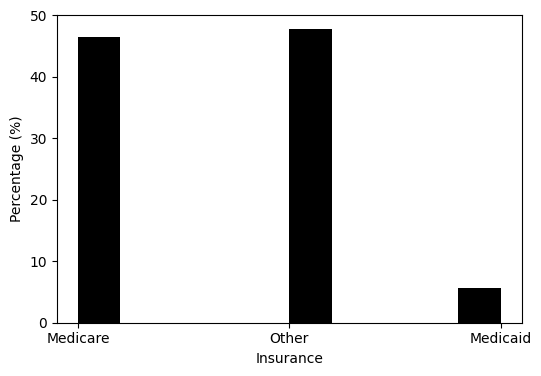

In [ ]:
# Note the high number of "other" for the patient's insurance
print('Insurance:')
print(Counter(patient_insurance))
plt.figure(figsize=(6,4))
plt.hist(patient_insurance, weights=100*np.ones(len(patient_insurance))/len(patient_insurance), color='k')
plt.xlabel('Insurance')
plt.ylabel('Percentage (%)')

Age:
Counter({72: 3020, 67: 2881, 70: 2793, 71: 2392, 64: 2373, 66: 2356, 73: 2327, 75: 2269, 68: 2235, 62: 2186, 69: 2103, 60: 2095, 63: 2059, 74: 2016, 65: 1934, 76: 1884, 77: 1837, 59: 1821, 58: 1792, 61: 1791, 52: 1766, 80: 1700, 81: 1700, 79: 1612, 57: 1586, 78: 1549, 56: 1504, 83: 1493, 84: 1401, 82: 1368, 55: 1341, 85: 1266, 50: 1126, 53: 1112, 54: 1110, 91: 1055, 47: 1011, 86: 950, 51: 848, 48: 823, 46: 813, 49: 744, 44: 696, 87: 640, 37: 557, 38: 550, 88: 506, 42: 489, 43: 475, 39: 459, 31: 448, 41: 434, 40: 427, 32: 417, 27: 407, 89: 367, 45: 355, 28: 317, 33: 273, 23: 265, 35: 255, 25: 226, 30: 207, 34: 163, 22: 156, 36: 145, 24: 126, 29: 114, 26: 95, 20: 68, 19: 61, 21: 40, 18: 17})


Text(0, 0.5, 'Percentage (%)')

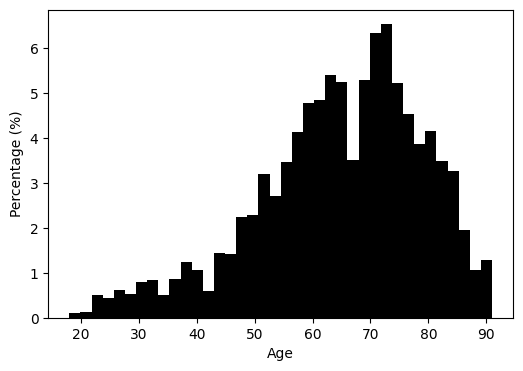

In [ ]:
print('Age:')
print(Counter(patient_age))
plt.figure(figsize=(6,4))
plt.hist(patient_age, weights=100*np.ones(len(patient_age))/len(patient_age), bins=ideal_hist_bins(patient_age), color='k')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')

Language:
Counter({'ENGLISH': 72504, '?': 9293})


Text(0, 0.5, 'Percentage (%)')

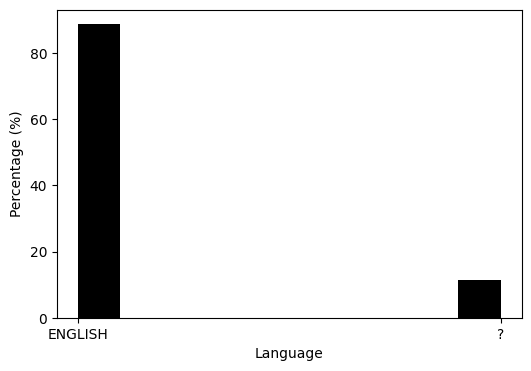

In [ ]:
print('Language:')
print(Counter(patient_language))
plt.figure(figsize=(6,4))
plt.hist(patient_language, weights=100*np.ones(len(patient_language))/len(patient_language), color='k')
plt.xlabel('Language')
plt.ylabel('Percentage (%)')

In [ ]:
 #pd.plotting.scatter_matrix(data);


# Work with Table One

In [ ]:
#!pip install tableone
from tableone import TableOne

# Create a list of columns to be included in the table
columns = ["gender", "race_group", "insurance","anchor_age","language"]

categorical = ["gender", "race_group", "insurance","language"]

# Create an instance of TableOne
table = TableOne(data, columns=columns, categorical = categorical, groupby='gender', sort=False, htest_name=True, pval=True)

#table = TableOne(data, columns=columns, categorical = categorical, groupby='gender', sort=True, htest_name=True, pval=True)


# Display the table
#print(table.tabulate(tablefmt="fancy_grid"))
table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by gender                                                                       
                                         Missing       Overall              F              M P-Value               Test
n                                                        81797          28903          52894                           
gender, n (%)         F                        0  28903 (35.3)  28903 (100.0)                 <0.001        Chi-squared
                      M                           52894 (64.7)                 52894 (100.0)                           
race_group, n (%)     Asian                    0    2234 (2.7)      496 (1.7)     1738 (3.3)  <0.001        Chi-squared
                      Black                         5644 (6.9)     2482 (8.6)     3162 (6.0)                           
                      Hispanic                      2821 (3.4)     1119 (3.9)     1702 (3.2)                           
                      Other                       15892 (19.4)    5859 (20.3)   10033 (19.0)                           
                      White                       55206 (67.5)   18947 (65.6)   36259 (68.6)                           
insurance, n (%)      Medicaid                 0    4688 (5.7)     1924 (6.7)     2764 (5.2)  <0.001        Chi-squared
                      Medicare                    38065 (46.5)   15689 (54.3)   22376 (42.3)                           
                      Other                       39044 (47.7)   11290 (39.1)   27754 (52.5)                           
anchor_age, mean (SD)                          0   64.7 (14.4)    67.4 (14.1)    63.3 (14.4)  <0.001  Two Sample T-test
language, n (%)       ?                        0   9293 (11.4)    3672 (12.7)    5621 (10.6)  <0.001        Chi-squared
                      ENGLISH                     72504 (88.6)   25231 (87.3)   47273 (89.4)

What is the $SaO_2$ / $SpO_2$ measurement values range?


(0.9, 1.1)

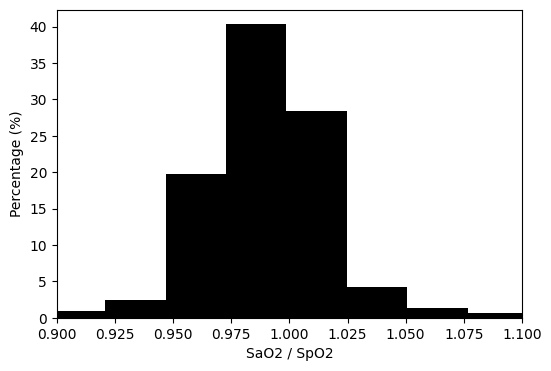

In [8]:
"""
The line of code o2_ratio = o2_ratio[o2_ratio != np.inf] is used to remove all infinite values from the o2_ratio array. 
The np.inf object represents infinity in NumPy, so this line of code will effectively remove all infinite values from the array.
The np.inf object is used to represent infinity in NumPy. It is a special floating-point value that is larger than any other finite
floating-point value. It is often used to represent values that are undefined or unknown.
"""

patient_SaO2 = data['SaO2']
patient_SpO2 = data['SpO2']
o2_ratio = patient_SaO2 / patient_SpO2
o2_ratio = o2_ratio[o2_ratio != np.inf]
o2_ratio = o2_ratio[(o2_ratio < 1.5) & (o2_ratio > 0.5)]

plt.figure(figsize=(6,4))
plt.hist(o2_ratio, weights=100*np.ones(len(o2_ratio))/len(o2_ratio), bins=ideal_hist_bins(o2_ratio), color='k')
plt.xlabel('SaO2 / SpO2')
plt.ylabel('Percentage (%)')
plt.xlim([0.9,1.1])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'White', 'Asian', 'Hispanic', 'Black', 'Other'}


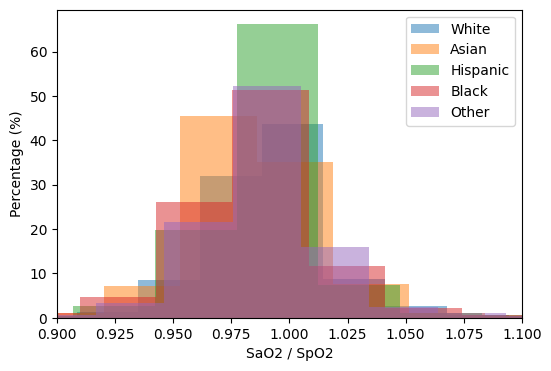

In [ ]:
all_patient_races = set(data['race_group'])
print(all_patient_races)

plt.figure(figsize=(6,4))
for temp_race_group in all_patient_races:
  temp_group = data[data['race_group'] == temp_race_group]
  patient_SaO2 = temp_group['SaO2']
  patient_SpO2 = temp_group['SpO2']
  o2_ratio = patient_SaO2 / patient_SpO2
  o2_ratio = o2_ratio[o2_ratio != np.inf]
  o2_ratio = o2_ratio[(o2_ratio < 1.5) & (o2_ratio > 0.5)]
  plt.hist(o2_ratio, weights=100*np.ones(len(o2_ratio))/len(o2_ratio), bins=ideal_hist_bins(o2_ratio), label=temp_race_group, alpha=0.5)

plt.xlabel('SaO2 / SpO2')
plt.ylabel('Percentage (%)')
plt.xlim([0.9,1.1])
plt.legend()

What is the typical $SaO_2$ - $SpO_2$ time offset?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Percentage (%)')

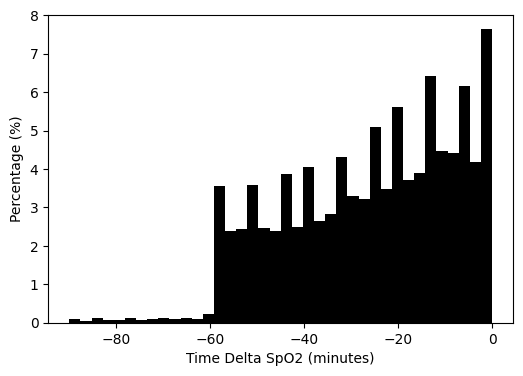

In [ ]:
patient_delta_SpO2 = data['delta_SpO2']

plt.figure(figsize=(6,4))
plt.hist(patient_delta_SpO2, weights=100*np.ones(len(patient_delta_SpO2))/len(patient_delta_SpO2), bins=ideal_hist_bins(patient_delta_SpO2), color='k')
plt.xlabel('Time Delta SpO2 (minutes)')
plt.ylabel('Percentage (%)')

Does that offset significantly vary for certain groups?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


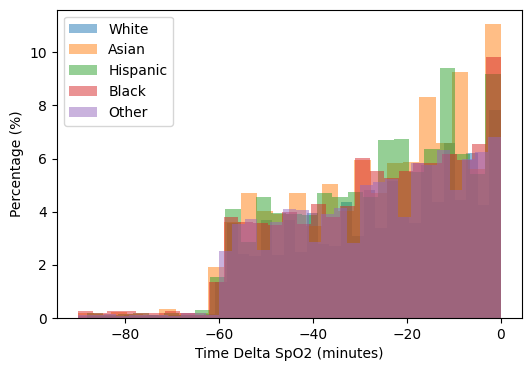

In [ ]:
# TODO: statistically analyze this

# By `race_group`
all_patient_races = set(data['race_group'])

plt.figure(figsize=(6,4))
for temp_race_group in all_patient_races:
  temp_group = data[data['race_group'] == temp_race_group]
  temp_group_delta = temp_group['delta_SpO2']
  plt.hist(temp_group_delta, weights=100*np.ones(len(temp_group_delta))/len(temp_group_delta), bins=ideal_hist_bins(temp_group_delta), alpha=0.5, label=temp_race_group)

plt.xlabel('Time Delta SpO2 (minutes)')
plt.ylabel('Percentage (%)')
plt.legend()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


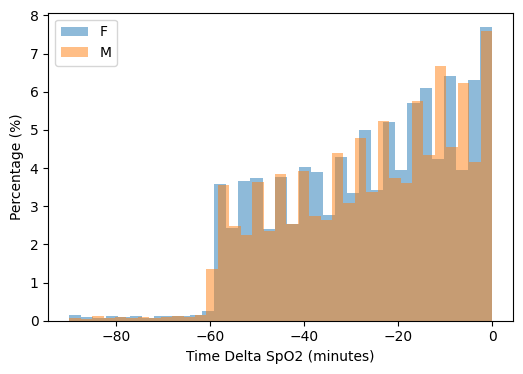

In [ ]:
# By `gender`
all_patient_genders = set(data['gender'])

plt.figure(figsize=(6,4))
for temp_gender in all_patient_genders:
  temp_group = data[data['gender'] == temp_gender]
  temp_group_delta = temp_group['delta_SpO2']
  plt.hist(temp_group_delta, weights=100*np.ones(len(temp_group_delta))/len(temp_group_delta), bins=ideal_hist_bins(temp_group_delta), alpha=0.5, label=temp_gender)

plt.xlabel('Time Delta SpO2 (minutes)')
plt.ylabel('Percentage (%)')
plt.legend()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


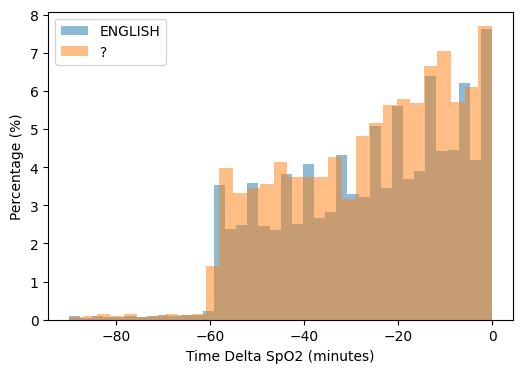

In [ ]:
# By `language`
all_patient_languages = set(data['language'])

plt.figure(figsize=(6,4))
for temp_language in all_patient_languages:
  temp_group = data[data['language'] == temp_language]
  temp_group_delta = temp_group['delta_SpO2']
  plt.hist(temp_group_delta, weights=100*np.ones(len(temp_group_delta))/len(temp_group_delta), bins=ideal_hist_bins(temp_group_delta), alpha=0.5, label=temp_language)

plt.xlabel('Time Delta SpO2 (minutes)')
plt.ylabel('Percentage (%)')
plt.legend()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


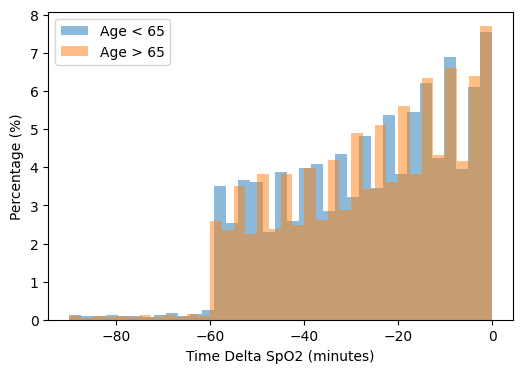

In [ ]:
# By `age`
all_patient_ages = ['Age < 65','Age > 65']

plt.figure(figsize=(6,4))
for temp_age in all_patient_ages:
  if temp_age == 'Age < 65':
    temp_group = data[data['anchor_age'] < 65]
  elif temp_age == 'Age > 65':
    temp_group = data[data['anchor_age'] >= 65]
  temp_group_delta = temp_group['delta_SpO2']
  plt.hist(temp_group_delta, weights=100*np.ones(len(temp_group_delta))/len(temp_group_delta), bins=ideal_hist_bins(temp_group_delta), alpha=0.5, label=temp_age)

plt.xlabel('Time Delta SpO2 (minutes)')
plt.ylabel('Percentage (%)')
plt.legend()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


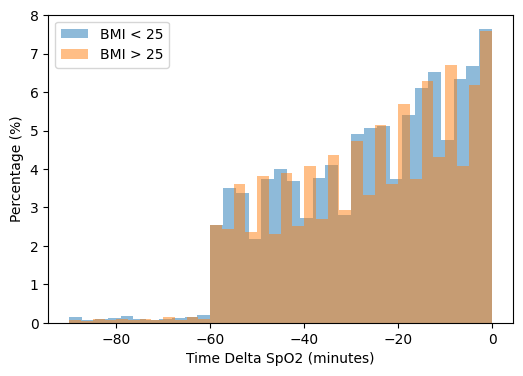

In [ ]:
# By `BMI`
all_patient_BMIs = ['BMI < 25','BMI > 25']

plt.figure(figsize=(6,4))
for temp_BMI in all_patient_BMIs:
  if temp_BMI == 'BMI < 25':
    temp_group = data[data['BMI'] < 25]
  elif temp_BMI == 'BMI > 25':
    temp_group = data[data['BMI'] >= 25]
  temp_group_delta = temp_group['delta_SpO2']
  plt.hist(temp_group_delta, weights=100*np.ones(len(temp_group_delta))/len(temp_group_delta), bins=ideal_hist_bins(temp_group_delta), alpha=0.5, label=temp_BMI)

plt.xlabel('Time Delta SpO2 (minutes)')
plt.ylabel('Percentage (%)')
plt.legend()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


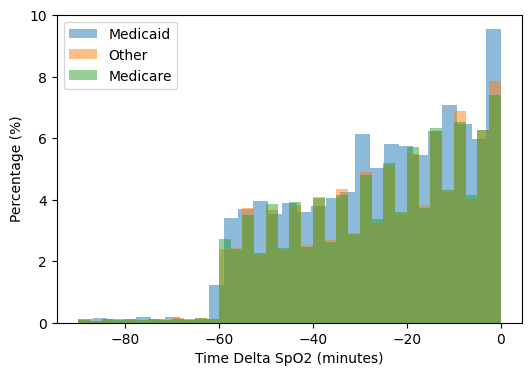

In [ ]:
# By `insurance`
all_patient_insurance = set(data['insurance'])

plt.figure(figsize=(6,4))
for temp_insurance in all_patient_insurance:
  temp_group = data[data['insurance'] == temp_insurance]
  temp_group_delta = temp_group['delta_SpO2']
  plt.hist(temp_group_delta, weights=100*np.ones(len(temp_group_delta))/len(temp_group_delta), bins=ideal_hist_bins(temp_group_delta), alpha=0.5, label=temp_insurance)

plt.xlabel('Time Delta SpO2 (minutes)')
plt.ylabel('Percentage (%)')
plt.legend()

In [ ]:
data['delta_SpO2'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    81797.000000
mean       -26.009511
std         17.978644
min        -90.000000
25%        -40.000000
50%        -24.000000
75%        -11.000000
max          0.000000
Name: delta_SpO2, dtype: float64

In [ ]:
# Create a list of columns to be included in the table
columns = ["gender", "race", "race_group", "insurance", "language", "anchor_age", "delta_SpO2"]

# Create an instance of TableOne
table = TableOne(data, columns=columns)

# Display the table
print(table.tabulate(tablefmt="fancy_grid"))

NameError: ignored

How many pairs do we have per patient?


In [ ]:
all_subjects = list(set(data['subject_id']))
all_pairs = []

for subject in all_subjects[:5]:
  temp_data = data[data['subject_id'] == subject]
  all_stays = set(temp_data['stay_id'])
  for stay in all_stays:
    temp_data = temp_data[temp_data['stay_id'] == stay]
    print(temp_data['los_hospital'])
    # print(len(set(temp_data['los_hospital'])))


24031    8
24032    8
Name: los_hospital, dtype: int64
Series([], Name: los_hospital, dtype: int64)
22728    5
Name: los_hospital, dtype: int64
72555    5
72556    5
72557    5
72558    5
Name: los_hospital, dtype: int64
25032    6
25033    6
25034    6
Name: los_hospital, dtype: int64
48863    17
48864    17
48865    17
48866    17
48867    17
48868    17
48869    17
48870    17
48871    17
48872    17
48873    17
48874    17
48875    17
48876    17
48877    17
48878    17
48879    17
48880    17
48881    17
48882    17
48883    17
48884    17
48885    17
48886    17
48887    17
Name: los_hospital, dtype: int64
Series([], Name: los_hospital, dtype: int64)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


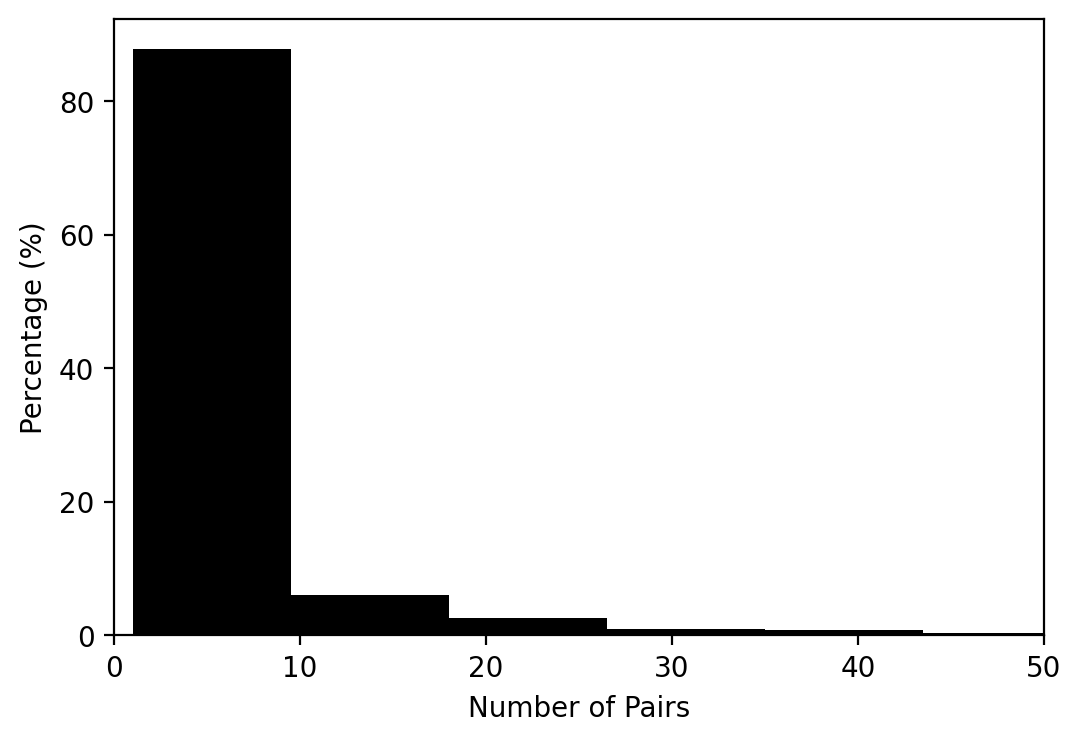

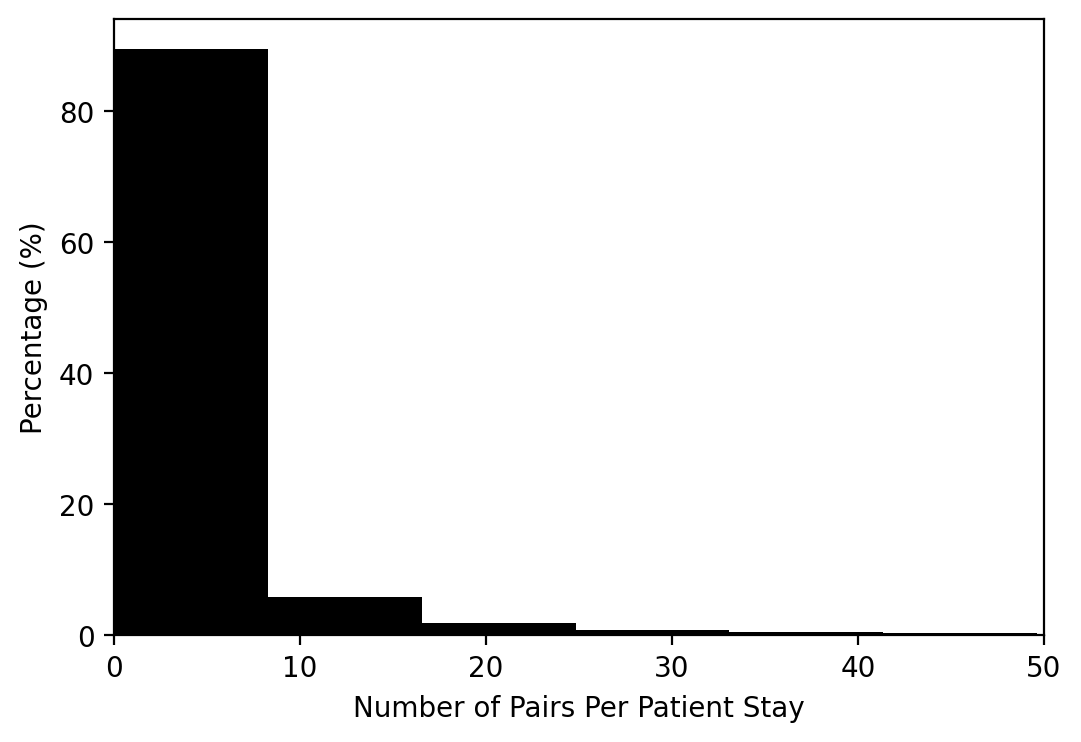

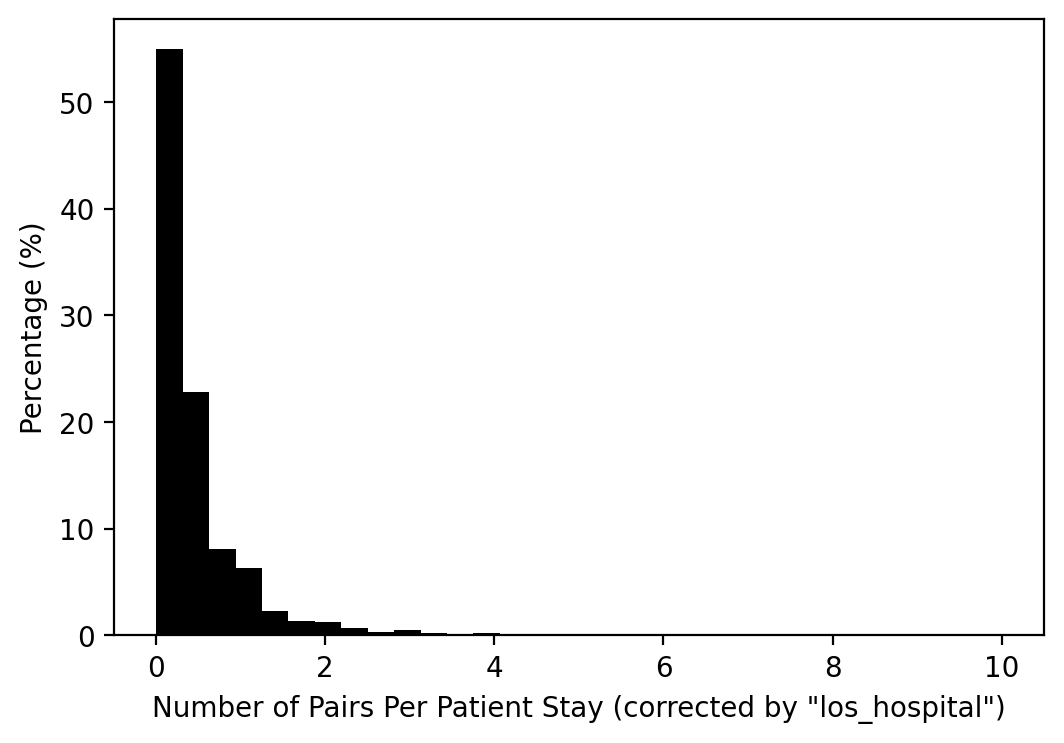

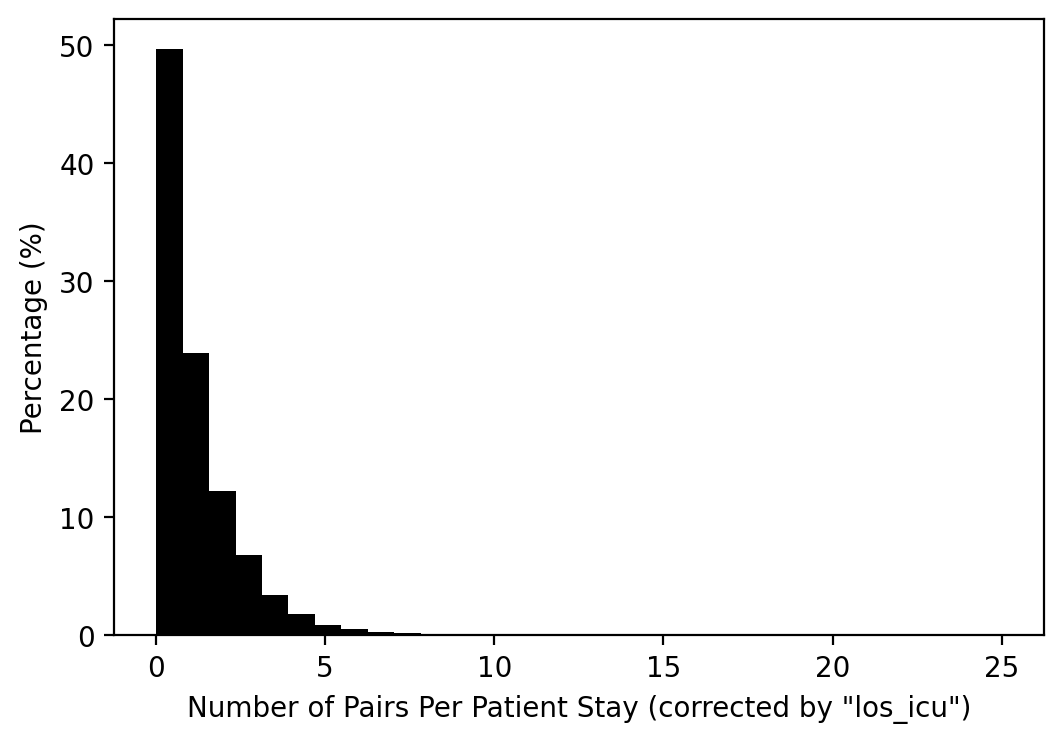

In [ ]:
# Correct by `los_hospital` or `los_icu`?
# Correct by number of stays?

# Total number of pairs per patient
all_subjects = set(data['subject_id'])
all_pairs = []

for subject in all_subjects:
  temp_data = data[data['subject_id'] == subject]
  all_pairs.append(temp_data['delta_SpO2'].notnull().sum())

plt.figure(figsize=(6,4))
plt.hist(all_pairs, weights=100*np.ones(len(all_pairs))/len(all_pairs), bins=ideal_hist_bins(all_pairs), color='k')
plt.xlim([0,50])
plt.xlabel('Number of Pairs')
plt.ylabel('Percentage (%)')
plt.show()


# Total number of pairs per patient stay
all_subjects = set(data['subject_id'])
all_pairs = []

for subject in all_subjects:
  temp_data = data[data['subject_id'] == subject]
  all_stays = set(temp_data['stay_id'])
  for stay in all_stays:
    temp_data = temp_data[temp_data['stay_id'] == stay]
    all_pairs.append(temp_data['delta_SpO2'].notnull().sum())

plt.figure(figsize=(6,4))
plt.hist(all_pairs, weights=100*np.ones(len(all_pairs))/len(all_pairs), bins=ideal_hist_bins(all_pairs), color='k')
plt.xlim([0,50])
plt.xlabel('Number of Pairs Per Patient Stay')
plt.ylabel('Percentage (%)')
plt.show()


# Total number of pairs per patient stay corrected for `los_hospital`
all_subjects = set(data['subject_id'])
all_pairs = []

for subject in all_subjects:
  temp_data = data[data['subject_id'] == subject]
  all_stays = set(temp_data['stay_id'])
  for stay in all_stays:
    temp_data = temp_data[temp_data['stay_id'] == stay]
    if len(set(temp_data['los_hospital'])) > 0:
      temp_los = list(set(temp_data['los_hospital']))[0]
      if temp_los > 0:
        all_pairs.append(temp_data['delta_SpO2'].notnull().sum() / temp_los)

plt.figure(figsize=(6,4))
plt.hist(all_pairs, weights=100*np.ones(len(all_pairs))/len(all_pairs), bins=ideal_hist_bins(all_pairs), color='k')
# plt.xlim([0,50])
plt.xlabel('Number of Pairs Per Patient Stay (corrected by "los_hospital")')
plt.ylabel('Percentage (%)')
plt.show()


# Total number of pairs per patient stay corrected for `los_icu`
all_subjects = set(data['subject_id'])
all_pairs = []

for subject in all_subjects:
  temp_data = data[data['subject_id'] == subject]
  all_stays = set(temp_data['stay_id'])
  for stay in all_stays:
    temp_data = temp_data[temp_data['stay_id'] == stay]
    if len(set(temp_data['los_icu'])) > 0:
      temp_los = list(set(temp_data['los_icu']))[0]
      if temp_los > 0:
        all_pairs.append(temp_data['delta_SpO2'].notnull().sum() / temp_los)

plt.figure(figsize=(6,4))
plt.hist(all_pairs, weights=100*np.ones(len(all_pairs))/len(all_pairs), bins=ideal_hist_bins(all_pairs), color='k')
# plt.xlim([0,50])
plt.xlabel('Number of Pairs Per Patient Stay (corrected by "los_icu")')
plt.ylabel('Percentage (%)')
plt.show()

Are there groups with different no. pairs?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


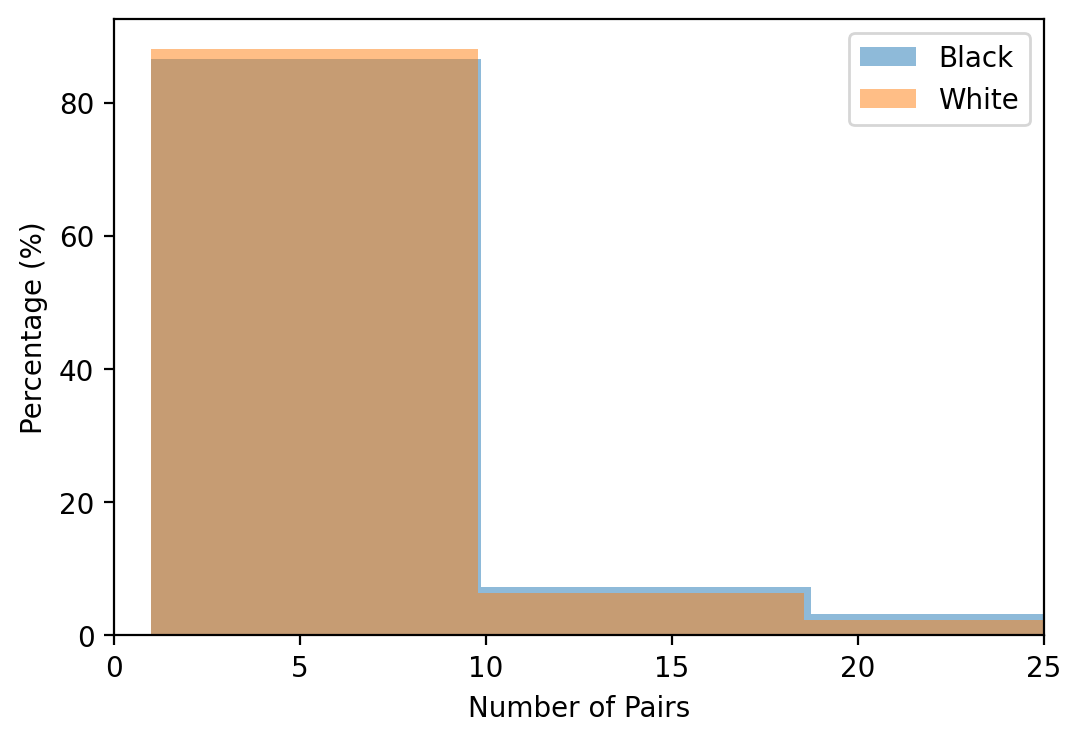

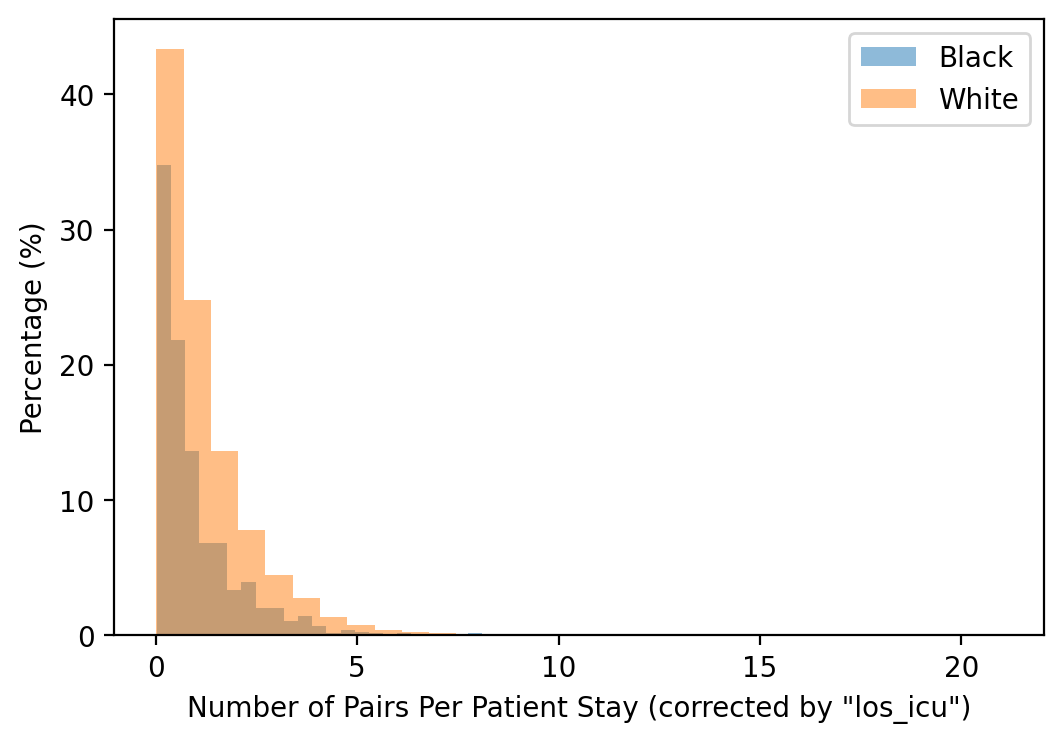

In [ ]:
# By `race_group`
all_patient_races = ['Black','White'] #set(data['race_group'])

plt.figure(figsize=(6,4))
for temp_race_group in all_patient_races:
  temp_group = data[data['race_group'] == temp_race_group]

  all_subjects = set(temp_group['subject_id'])
  all_pairs = []
  for subject in all_subjects:
    temp_data = temp_group[temp_group['subject_id'] == subject]
    all_pairs.append(temp_data['delta_SpO2'].notnull().sum())

  plt.hist(all_pairs, weights=100*np.ones(len(all_pairs))/len(all_pairs), bins=ideal_hist_bins(all_pairs), alpha=0.5, label=temp_race_group)

plt.xlim([0,25])
plt.xlabel('Number of Pairs')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()


# By `race_group` corrected for `los_icu`
all_patient_races = ['Black','White']

plt.figure(figsize=(6,4))
for temp_race_group in all_patient_races:
  temp_group = data[data['race_group'] == temp_race_group]
  all_subjects = set(temp_group['subject_id'])
  all_pairs = []

  for subject in all_subjects:
    temp_data = temp_group[temp_group['subject_id'] == subject]
    all_stays = set(temp_data['stay_id'])
    for stay in all_stays:
      temp_data = temp_data[temp_data['stay_id'] == stay]
      if len(set(temp_data['los_icu'])) > 0:
        temp_los = list(set(temp_data['los_icu']))[0]
        if temp_los > 0:
          all_pairs.append(temp_data['delta_SpO2'].notnull().sum() / temp_los)

  plt.hist(all_pairs, weights=100*np.ones(len(all_pairs))/len(all_pairs), bins=ideal_hist_bins(all_pairs), alpha=0.5, label=temp_race_group)

# plt.xlim([0,50])
plt.xlabel('Number of Pairs Per Patient Stay (corrected by "los_icu")')
plt.ylabel('Percentage (%)')
ax = plt.gca()
# ax.set_yscale('log')
plt.legend()
plt.show()

These questions are mere examples. Which other questions are relevant?

In [ ]:
# Code here!

In [ ]:
# Code here!

In [ ]:
# Code here!

### ✏️ Apply you Inclusion / Exclusion Criteria

Now that we have done some Initial EDA, let's define criteria for the study cohort selection

**How to identify Sampling and Representation Bias in a systematic way?**

When we apply inclusion / exclusion criteria, it is important to keep track of the patients that are being left out of the study to spotlight points of sampling bias.

We can create a function that gets the demographic information from a dataframe of patients, to be run this each time we apply an exclusion criteria. 

**This is a good practice of study cohort selection!**

In [ ]:
import pandas as pd
from typing import Dict

def get_demography(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """Get the demography of the cohort.

    Args:
        df (pd.DataFrame): The cohort dataframe.

    Returns:
        dict: A dictionary containing demographic information such as race, sex, 
              and English proficiency, with corresponding proportions.
    """
    demo = {}
    
    demo["race"] = df["race_group"].value_counts(normalize=True).to_dict()

    demo["sex"] = {
        "Male": df["sex_female"].value_counts(normalize=True)[0],
        "Female": df["sex_female"].value_counts(normalize=True)[1]
    }
    
    demo["language"] = df["language"].value_counts(normalize=True).to_dict()

    # You can add other Variables here, following the same structure

    return demo

def print_demo(demo):
    """ Print
      Args:
        dict: A dictionary containing demographic information such as race, sex, 
                English proficiency, ..., with corresponding proportions.
      Returns:
        str: A formatted string to display demographics, that can be printed. 
    """

    demo_str = ""
    for key, value in demo.items():
        if isinstance(value, dict):
            demo_str += f"{key}: ["
            for key2, value2 in value.items():
                demo_str += f"{key2}: {round(value2*100,1)}%, "
            demo_str = demo_str[:-2] + "]\n "
        else:
            demo_str += f"{key}: {round(value*100,1)}%, "
    demo_str = demo_str[:-2]

    return demo_str

  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Working Example on the Dataset we just loaded
print_demo(get_demography(data))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]\n sex: [Male: 64.7%, Female: 35.3%]\n language: [ENGLISH: 88.6%, ?: 11.4%]'

We suggest this structure to systematically get the numbers to produce a flowchart:
```
# Remove patients XXX
data_1 = data[data.YYY != XXX]
print(f"Removed {len(data) - len(data_1)} patients without XXX")
demo1 = print_demo(get_demography(df1))
print(f"{len(data_1)} stays with ZZZ \n({demo1})\n")

# Remove ... 
data_2 = ...
```



In [ ]:
# Code here!


`Create a visual diagram and Upload it here:`

`Save your dataframe to be used from now on:`

In [ ]:
data_final.to_csv("your_destination_path_here.csv")

NameError: ignored

**MIMIC-IV Demographics (for Comparison with your Cohort)**

This is not exhaustive, but should be if we were to apply this in a real-world scenario!

| Variable                 |          | MIMIC-IV|
|--------------------------|----------|---------|
| **Total Patients**       |          | 50,920|
| **Race-Ethnicity (%)**   | Asian    | 2.94    |
|                          | Black    | 10.9    |
|                          | Hispanic | 3.83    |
|                          | Other    | 14.2    |
|                          | White    | 68.2    |
| **Sex (%)**              | Female   | 44.2    |
| **Proficiency (%)**      | Limited  | 10.2    |


### ✏️ Sampling Selection Bias

Comparing your cohort with MIMIC-IV demographics, what differences can you identify?

`Report and Discuss Sampling Selection Bias:`



* 

* 

**Other Sources of Sampling Selection Bias - Consider this:**

*Black and Hispanic individuals are less likely to receive potentially life-saving cardiopulmonary resuscitation (CPR) from bystanders compared to White individuals, according to a [NEJM study](https://www.nejm.org/doi/full/10.1056/NEJMoa2200798?query=recirc_curatedRelated_article)*.

Garcia, R. A., Spertus, J. A., Girotra, S., Nallamothu, B. K., Kennedy, K. F., McNally, B. F., Breathett, K., Del Rios, M., Sasson, C., & Chan, P. S. (2022). Racial and Ethnic Differences in Bystander CPR for Witnessed Cardiac Arrest. The New England journal of medicine, 387(17), 1569–1578. https://doi.org/10.1056/NEJMoa2200798


**Who does not make it to MIMIC-IV in the first place?**

**Who does not make it to our Pulse Oximetry dataset?**

Is it because of:

* Sampling selection bias as regards who have access to healthcare?

* Sampling selection bias as regards the hospital’s ICU admission criteria?

* Sampling selection bias from Measurement Bias (irregular sampling for certain groups)?

### ✏️ Discussion and Potential Solutions

`As a group, think of other sources and potential solutions:`

* 

* 

## 3. Data Exploration and Visualization

Now that we have our study cohort, let's look at the ground-truths of the data.



The dataset we created has a binary variable "hidden_hypoxemia" where $SaO_2$ < 88% but $SpO_2$ ≥ 88%.

This is just a possibility. Different studies have different definitions. Discuss with the clinicians which definition is better suited for this problem, taking into consideration the trade-off acuity of Hidden Hypoxemia and sample size.

### ✏️ Hidden Hypoxemia (HH) Definition 

`What is your HH Definition?`

In [ ]:
SaO2_HH = # xx%, actual oxygen saturation is below this value
SpO2_HH = # yy%, but Pulse Oximeter measurement is above this



`If different from the one we defined, create a new column in your dataset with it:`



In [ ]:
data['HH_study'] = data.apply(lambda row: 1 if(row.SaO2 <  SaO2_HH) \
                                            & (row.SpO2 >= SpO2_HH) \
                                            else 0, axis =1)

### ✏️ Visualizations

#### Calibration Maps

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
import seaborn as sns


def sao2_spo2_plot(df, SaO2_HH=88, SpO2_HH=88, lbl_text="Measured"):

    r2 = r2_score(data.SaO2, data.SpO2)
    print(data.SaO2)
    print(data.SpO2)

    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(5,5)

    ax_scatter = fig.add_subplot(gs[1:5, 0:4])

    df_norm = df[~((data.SaO2 < SaO2_HH) & (data.SpO2 >= SpO2_HH))]
    df_hypo = df[(data.SaO2 < SaO2_HH) & (data.SpO2 >= SpO2_HH)]

    hh = len(df_hypo)
    tot = len(df_norm) + len(df_hypo)

    sns.scatterplot(df_norm, x='SpO2', y='SaO2',
                    marker='o', alpha=0.1, ax=ax_scatter)
    sns.scatterplot(df_hypo, x='SpO2', y='SaO2',
                    marker='o', color="tab:red", alpha=0.1, ax=ax_scatter,
                    label="H.H")
    ax_scatter.set_xlabel(f'{lbl_text} SpO2 (%)')
    ax_scatter.set_ylabel('SaO2 (%)')
    ax_scatter.set_xlim([64, 102])
    ax_scatter.set_ylim([64, 102])
    ax_scatter.grid(False)
    ax_scatter.get_legend().remove()

    ax_hist_x = fig.add_subplot(gs[0,0:4])
    sns.kdeplot(x=data.SpO2, ax=ax_hist_x, color='green', fill=True)
    ax_hist_x.xaxis.set_ticklabels([])
    ax_hist_x.grid(False)
    ax_hist_x.set_xlabel('')
    ax_hist_x.set_ylim([0,.35])
    ax_hist_x.axvline(x=data.SpO2.mean(), linewidth=0.8,
                    linestyle='--', color='green',
                    label="SpO2 Mean")


    ax_hist_y = fig.add_subplot(gs[1:5, 4])
    sns.kdeplot(y=data.SaO2, ax=ax_hist_y, color='orange', fill=True)
    ax_hist_y.yaxis.set_ticklabels([])
    ax_hist_y.grid(False)
    ax_hist_y.set_ylabel('')
    ax_hist_y.set_xlim([0,.35])
    ax_hist_y.axhline(y=data.SaO2.mean(), xmin=0, xmax=1,
                    linewidth=0.8, linestyle='--', color='orange',
                    label="SaO2 Mean")

    fig.legend(loc='upper right', bbox_to_anchor=(0.915, 0.85),
               ncol=1, fontsize=9)

    fig.suptitle(f"SaO2 vs SpO2: R\u00B2 = {r2:.2f}, H.H = {hh} / {tot}",
                 fontsize=16, y=0.95)

    plt.show()


In [ ]:
sao2_spo2_plot(data, SaO2_HH=88, SpO2_HH=88, lbl_text="Measured")

NameError: ignored

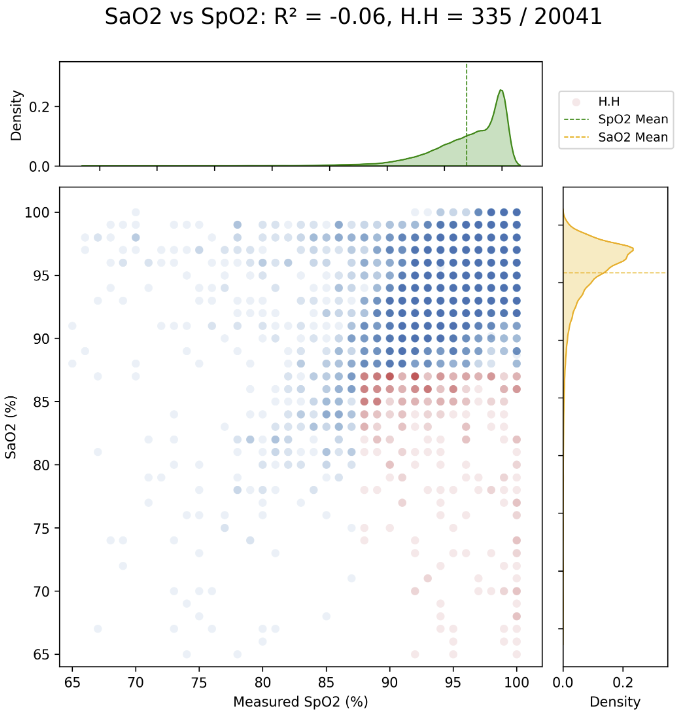

#### Measurements Distributions

In [ ]:
def sao2_spo2_dists(data, races):

  fig, ax = plt.subplots(len(races), 1, sharex= True, sharey=True,
                        figsize=(2 * len(races), 5))

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SaO2, ax=ax[i],
                  color='orange', fill=True, label="SaO2")
      sns.kdeplot(x=data[data.race_group == r].SpO2, ax=ax[i],
                  color='green', fill=True, label="SpO2")
      ax[i].set_xlim([90,100])
      ax[i].legend(loc='upper left', ncol=1, fontsize=9)
      ax[i].set_xlabel('O2 Saturation (%)')
      ax[i].set_title(f'{r} Patients')

  fig.suptitle('SaO2 and SpO2 Density Distributions')
  plt.show()

In [ ]:
# Encode Race Groups
data.race_group = data.race_group.apply(lambda x: 'Non-White' if x != 'White' \
                                                              else 'White')

races = data.race_group.unique() #["White", "Non-White"]

In [ ]:
sao2_spo2_dists(data, races)

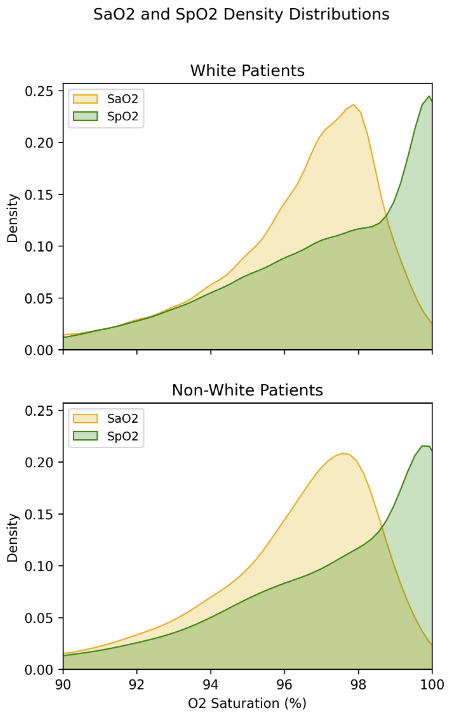

#### Gap Distributions

In [ ]:
def sao2_spo2_gap(data, races, comparison="White vs. Non-White"):

  fig, ax = plt.subplots(1, 1, sharex= True, sharey=True, figsize=(8,4))

  colors = ['green', 'black']

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SpO2 - data[data.race_group == r].SaO2,
                  ax=ax, color=colors[i], fill=True, label=r)
      
  ax.set_xlim([-4,4])
  ax.legend(loc='upper left', ncol=1, fontsize=9)
  ax.set_xlabel('SpO2 - SaO2 (%)')
  ax.set_title(f'SpO2 - SaO2 Gap Distribution, {comparison} Patients')

  plt.show()

In [ ]:
sao2_spo2_gap(data, races, comparison="White vs. Non-White")

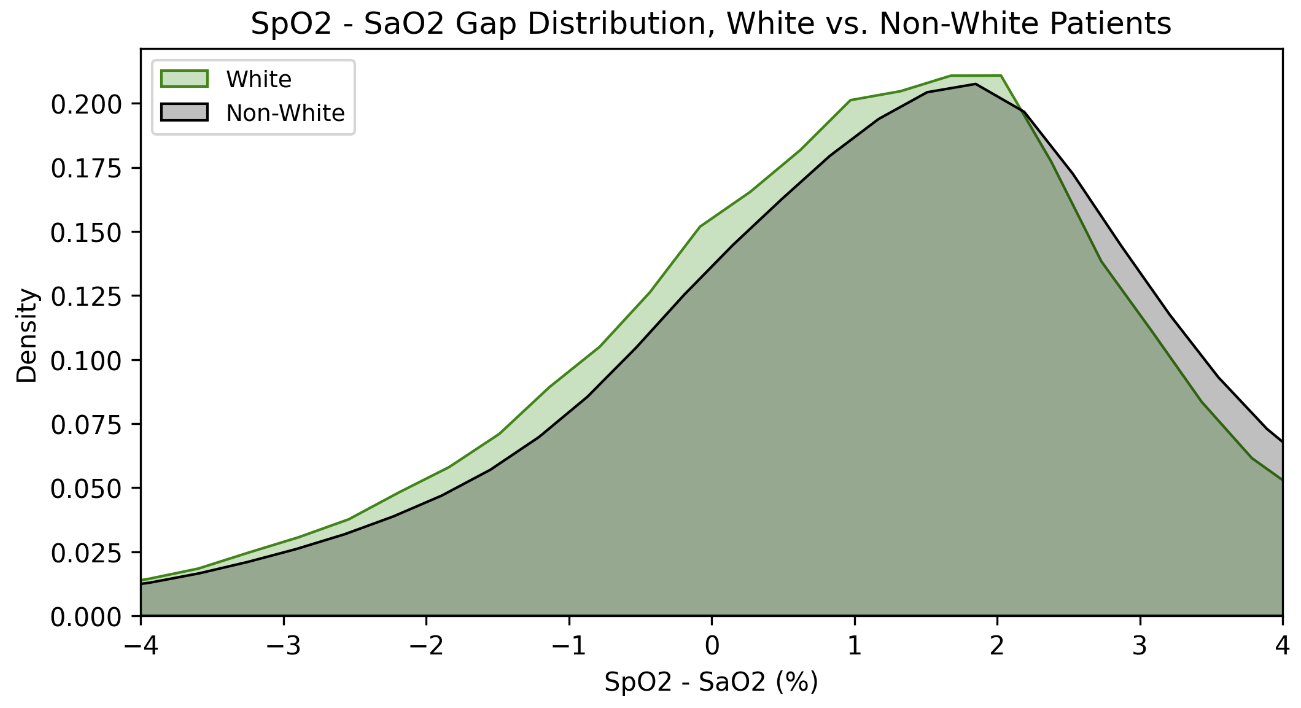

### ✏️ Further EDA
`Create code below to answer the following questions`


What is the Outcome Distribution? 

In [ ]:
# Code here!

Is it more pronounced across certain groups?

In [ ]:
# Code here!

Add Other Questions that may be relevant

In [ ]:
# Code here!

In [ ]:
# Code here!

## 4. ML Task Definition

​
**We suggest (but not limited to), 4 possible ML tasks:**

* Hidden Hypoxemia Prediction (Classification)
* $SaO_2$ Prediction (Regression)
* $SaO_2 - SpO_2$ Gap Prediction (Regresion)
* $SaO_2 - SpO_2$ Gap Magnitude Prediction (Classification)

Discuss, as a team:

* Which task yields more value to tackle the presented problem?

* Which task is more prone to errors or biases?

* Where do we have more information?

* Where is there more outcome imbalance?

* Which decision-support algorithm would not harm patients further?

* How will the evaluation be done if we pick a certain task?

* Can we solve more than one task at once?


**Keep in mind that there is no right answer!**
​

### ✏️ Pick one!

`Pick one, or suggest your own:`